In [1]:
%matplotlib inline

# Standard imports
import copy
import itertools

# Scientific computing imports
import numpy
import matplotlib.pyplot as plt
import networkx as nx
import pandas
import seaborn; seaborn.set()

# Import widget methods
from IPython.html.widgets import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


(16, 24)


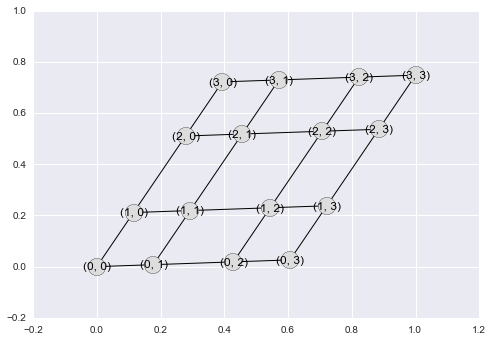

In [2]:
L=4
g = nx.grid_graph(dim=[L,L])
#g.add_edge((0,1),(1,2))
#d=g.to_directed()

g_layout = nx.spectral_layout(g)
#g.remove_node((0,1))
#print(g.edges())
#g.remove_edge((0,0),(0,1))
nx.draw_networkx(g, pos=g_layout, node_color='#dddddd')
print((g.number_of_nodes(), g.number_of_edges()))

#d=g.to_directed()
#print(d.edges())

plt.show()





<class 'networkx.classes.graph.Graph'>
{}
({}, {})
(2, 1)
[(0, 0), (1, 0)]
((0, 0), (1, 0))
[((0, 0), (1, 0))]


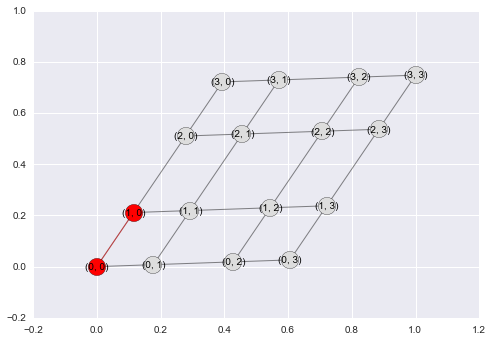

In [102]:
# Set source and sink
s=(0,0)
t=(numpy.random.randint(L),numpy.random.randint(L))
print(type(g))
print(g.node[t])
print (g.node[s], g.node[t])

healthy_nodes = g.nodes()
print(healthy_nodes[2])
p=nx.shortest_path(g,source=s,target=t)
print(p)

p_el=[]
for i in range(0,len(p)-1):
    print(p[i],p[i+1])
    p_el.append((p[i],p[i+1]))
    
print(p_el)

# Remove the infected from healthy nodes
healthy_nodes = [node for node in healthy_nodes if node not in p]


# Now we can visualize the infected node's position
f = plt.figure()
nx.draw_networkx_nodes(g, g_layout,
                       nodelist=p,
                       node_color='red')

nx.draw_networkx_nodes(g, g_layout,
                       nodelist=healthy_nodes,
                       node_color='#dddddd')

nx.draw_networkx_edges(g, g_layout, 
                       width=1.0, 
                       alpha=0.5,
                       edge_color='#111111')

nx.draw_networkx_edges(g, g_layout,
                       edgelist=p_el,
                       width=1.0, 
                       alpha=0.5,
                       edge_color='red')


_ = nx.draw_networkx_labels(g, g_layout,
                        dict(zip(g.nodes(), g.nodes())),
                        font_size=10)


<class 'networkx.classes.graph.Graph'>
{}
({}, {})
(2, 1)
([(0, 1), (1, 0)], 2)
(0, 1)
[(0, 0), (0, 1)]
Start Loop
[(0, 0), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 1), (3, 2), (3, 3), (2, 3), (2, 2), (3, 2), (2, 2), (2, 3), (2, 2), (1, 2), (2, 2), (3, 2), (3, 1), (3, 2), (2, 2), (1, 2), (1, 3), (0, 3), (0, 2)]
[((0, 0), (0, 1)), ((0, 1), (0, 0)), ((0, 0), (1, 0)), ((1, 0), (2, 0)), ((2, 0), (3, 0)), ((3, 0), (3, 1)), ((3, 1), (3, 2)), ((3, 2), (3, 1)), ((3, 1), (3, 2)), ((3, 2), (3, 3)), ((3, 3), (2, 3)), ((2, 3), (2, 2)), ((2, 2), (3, 2)), ((3, 2), (2, 2)), ((2, 2), (2, 3)), ((2, 3), (2, 2)), ((2, 2), (1, 2)), ((1, 2), (2, 2)), ((2, 2), (3, 2)), ((3, 2), (3, 1)), ((3, 1), (3, 2)), ((3, 2), (2, 2)), ((2, 2), (1, 2)), ((1, 2), (1, 3)), ((1, 3), (0, 3)), ((0, 3), (0, 2))]


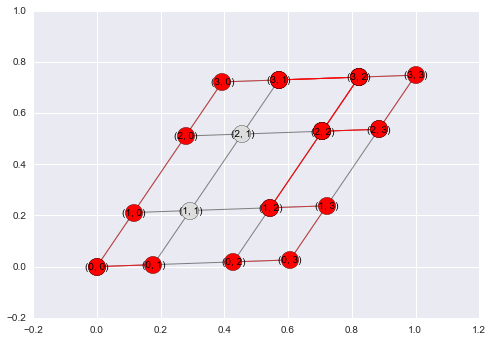

In [6]:
# Set source and sink
s=(0,0)
t=(numpy.random.randint(L),numpy.random.randint(L))
print(type(g))
print(g.node[t])
print (g.node[s], g.node[t])

healthy_nodes = g.nodes()
print(healthy_nodes[2])

#Random Walk
#initialize
p=[]
p.append(s)
p_neighbors=g.neighbors(s)
print(p_neighbors,len(p_neighbors))
pr=numpy.random.randint(len(p_neighbors))
p_next=p_neighbors[numpy.random.randint(len(p_neighbors))]
print(p_next)
p.append(p_next)
print(p)

print('Start Loop')

while t not in p:
    p_neighbors=g.neighbors(p[-1])
    p_neighbors
    p_next=p_neighbors[numpy.random.randint(len(p_neighbors))]
    p.append(p_next)

print(p)

p_el=[]
for i in range(0,len(p)-1):
    p_el.append((p[i],p[i+1]))
    
print(p_el)

# Remove the infected from healthy nodes
healthy_nodes = [node for node in healthy_nodes if node not in p]


# Now we can visualize the infected node's position
f = plt.figure()
nx.draw_networkx_nodes(g, g_layout,
                       nodelist=p,
                       node_color='red')

nx.draw_networkx_nodes(g, g_layout,
                       nodelist=healthy_nodes,
                       node_color='#dddddd')

nx.draw_networkx_edges(g, g_layout, 
                       width=1.0, 
                       alpha=0.5,
                       edge_color='#111111')

nx.draw_networkx_edges(g, g_layout,
                       edgelist=p_el,
                       width=1.0, 
                       alpha=0.5,
                       edge_color='red')


_ = nx.draw_networkx_labels(g, g_layout,
                        dict(zip(g.nodes(), g.nodes())),
                        font_size=10)


<class 'networkx.classes.digraph.DiGraph'>
{}
({}, {})
(3, 2)
Start Loop
[(0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (1, 2), (2, 2)]
[((0, 0), (1, 0)), ((1, 0), (0, 0)), ((0, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2))]


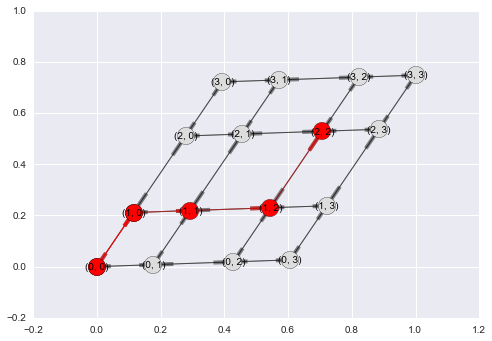

In [12]:
#Directed Version
# Set source and sink
g=g.to_directed()
s=(0,0)
t=(numpy.random.randint(L),numpy.random.randint(L))
print(type(g))
print(g.node[t])
print (g.node[s], g.node[t])

healthy_nodes = g.nodes()
print(healthy_nodes[2])

#Random Walk
#initialize
p=[]
p.append(s)


print('Start Loop')

while t not in p:
    p_neighbors=g.neighbors(p[-1])
    p_neighbors
    p_next=p_neighbors[numpy.random.randint(len(p_neighbors))]
    p.append(p_next)

print(p)

p_el=[]
for i in range(0,len(p)-1):
    p_el.append((p[i],p[i+1]))
    
print(p_el)

# Remove the infected from healthy nodes
healthy_nodes = [node for node in healthy_nodes if node not in p]


# Now we can visualize the infected node's position
f = plt.figure()
nx.draw_networkx_nodes(g, g_layout,
                       nodelist=p,
                       node_color='red')

nx.draw_networkx_nodes(g, g_layout,
                       nodelist=healthy_nodes,
                       node_color='#dddddd')

nx.draw_networkx_edges(g, g_layout, 
                       width=1.0, 
                       alpha=0.5,
                       edge_color='#111111')

nx.draw_networkx_edges(g, g_layout,
                       edgelist=p_el,
                       width=1.0, 
                       alpha=0.5,
                       edge_color='red')


_ = nx.draw_networkx_labels(g, g_layout,
                        dict(zip(g.nodes(), g.nodes())),
                        font_size=10)
